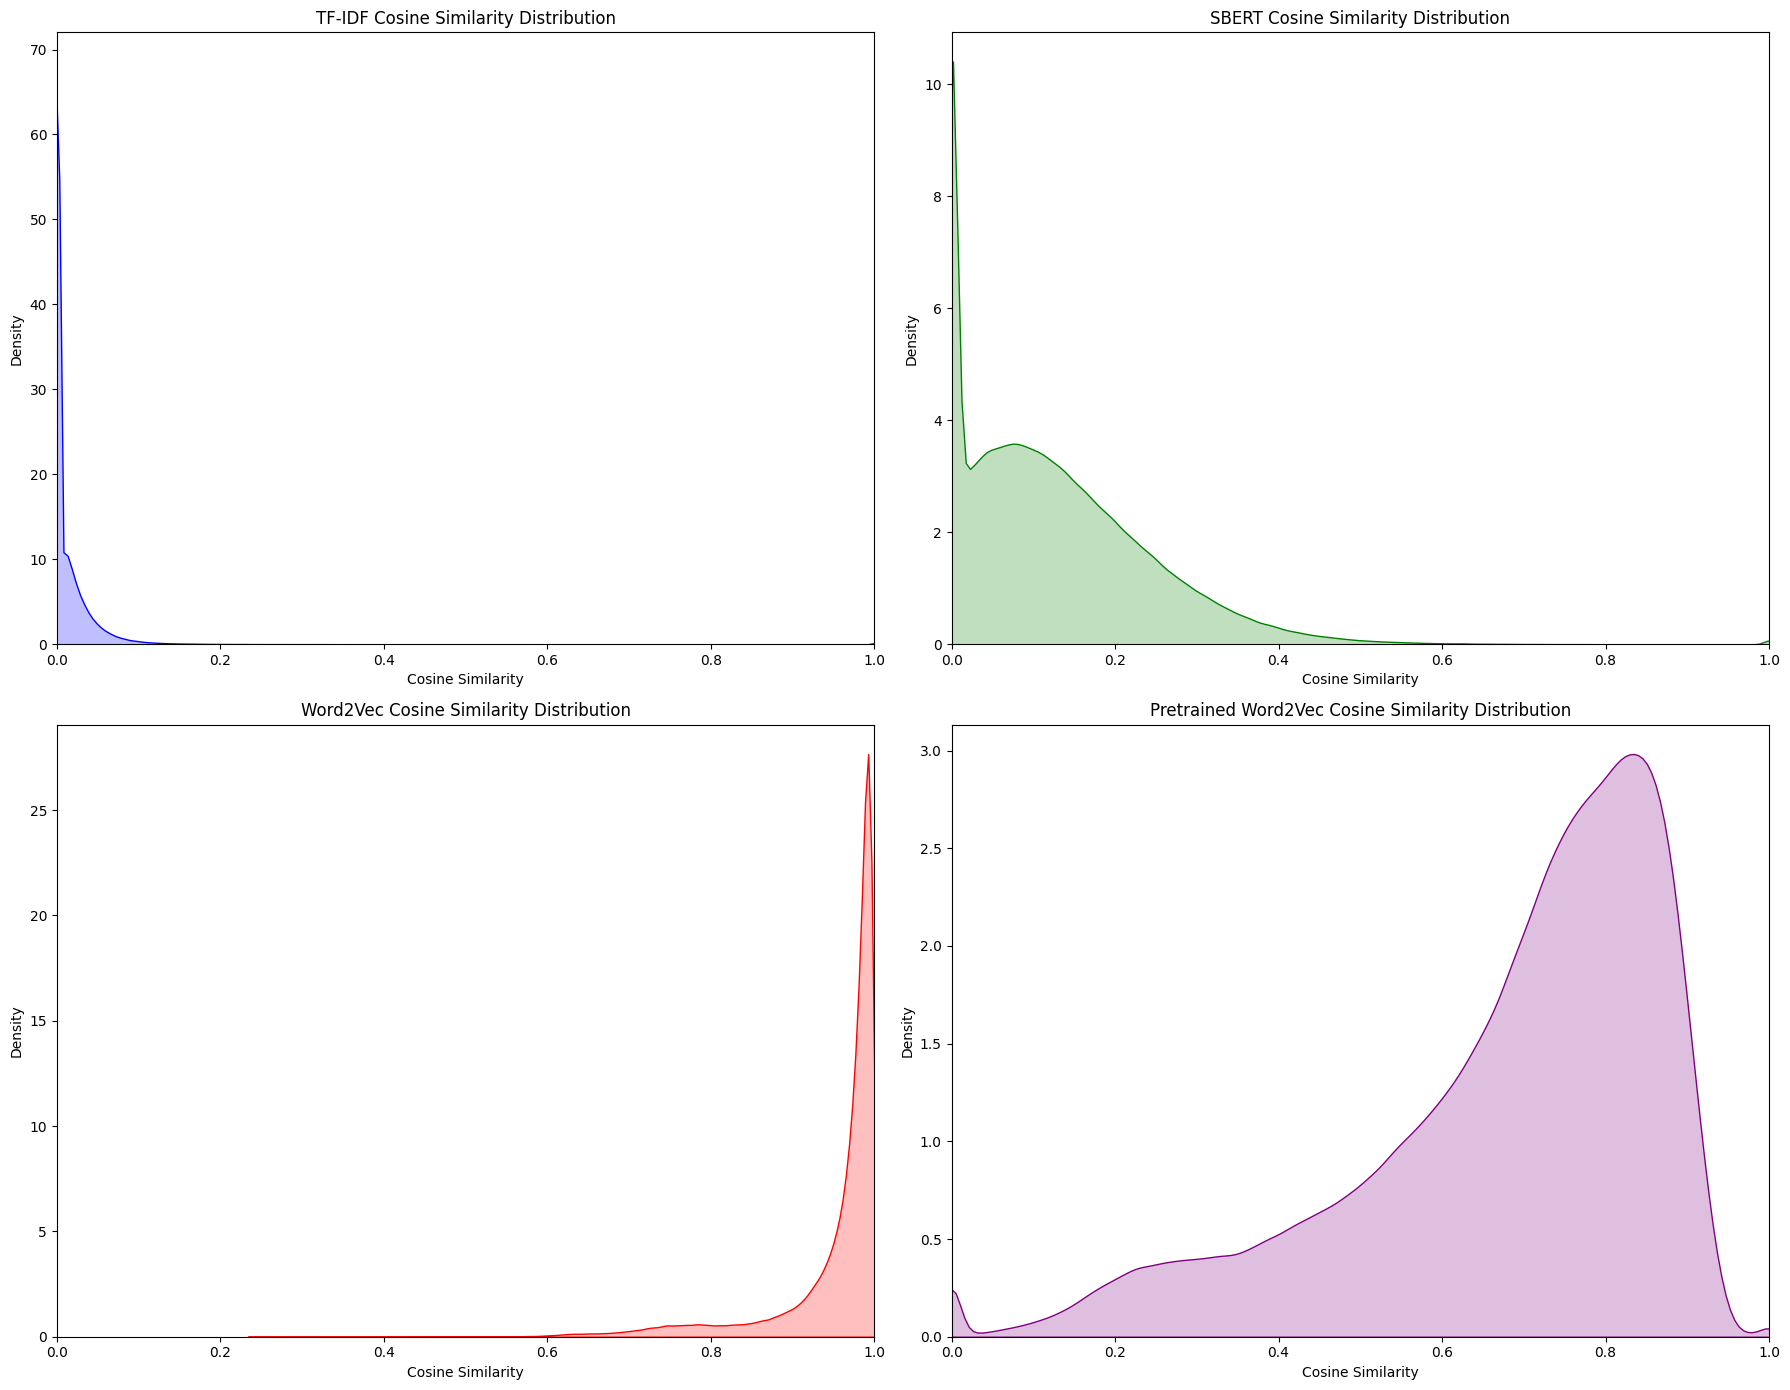

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load similarity matrices
cosine_sim_matrix_tfidf = pd.read_csv(
    "../caption_from_body/posts_similarity_matrix.csv"
)
cosine_sim_matrix_sbert = pd.read_csv(
    "../caption_from_body/posts_similarity_matrix_sbert.csv"
)
cosine_sim_matrix_word2vec = pd.read_csv(
    "../caption_from_body/posts_similarity_matrix_word2vec.csv"
)
cosine_sim_matrix_PT_word2vec = pd.read_csv(
    "../caption_from_body/posts_similarity_matrix_PT_word2vec.csv"
)

# Flatten the matrices to 1D for KDE plotting (excluding diagonal values)
flattened_tfidf = cosine_sim_matrix_tfidf.values[np.triu_indices_from(cosine_sim_matrix_tfidf.values, k=1)]
flattened_sbert = cosine_sim_matrix_sbert.values[np.triu_indices_from(cosine_sim_matrix_sbert.values, k=1)]
flattened_word2vec = cosine_sim_matrix_word2vec.values[np.triu_indices_from(cosine_sim_matrix_word2vec.values, k=1)]
flattened_PT_word2vec = cosine_sim_matrix_PT_word2vec.values[np.triu_indices_from(cosine_sim_matrix_PT_word2vec.values, k=1)]

# Clip negative values for SBERT, Word2Vec, and Pretrained Word2Vec similarity (cosine similarity should be between 0 and 1)
flattened_sbert = np.clip(flattened_sbert, 0, 1)
flattened_word2vec = np.clip(flattened_word2vec, 0, 1)
flattened_PT_word2vec = np.clip(flattened_PT_word2vec, 0, 1)

# Plot KDEs with shaded area
plt.figure(figsize=(18, 14))

# Plot TF-IDF KDE (First row, first column)
plt.subplot(2, 2, 1)
sns.kdeplot(flattened_tfidf, fill=True, color='blue')
plt.title("TF-IDF Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.xlim(0, 1)

# Plot SBERT KDE (First row, second column)
plt.subplot(2, 2, 2)
sns.kdeplot(flattened_sbert, fill=True, color='green')
plt.title("SBERT Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.xlim(0, 1)

# Plot Word2Vec KDE (Second row, first column)
plt.subplot(2, 2, 3)
sns.kdeplot(flattened_word2vec, fill=True, color='red')
plt.title("Word2Vec Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.xlim(0, 1)

# Plot Pretrained Word2Vec KDE (Second row, second column)
plt.subplot(2, 2, 4)
sns.kdeplot(flattened_PT_word2vec, fill=True, color='purple')
plt.title("Pretrained Word2Vec Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()
